In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import EfficientNetB0
from keras.layers import Dropout, Dense, Flatten

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [ ]:
from sklearn.utils import class_weight

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from keras import Model

In [ ]:
train_folder = '/content/gdrive/My Drive/Winter 2022/Deep Learning/lung _cancer_Dataset/train/'
val_folder = '/content/gdrive/My Drive/Winter 2022/Deep Learning/lung _cancer_Dataset/valid/'
test_folder = '/content/gdrive/My Drive/Winter 2022/Deep Learning/lung _cancer_Dataset/test/'

In [ ]:
class_names = os.listdir(train_folder) # Get names of classes
class_name2id = { label: index for index, label in enumerate(class_names) } # Map class names to integer labels

In [ ]:
class_names

['bbps-0-1',
 'ulcerative-colitis-grade-2',
 'pylorus',
 'dyed-lifted-polyps',
 'retroflex-stomach',
 'polyps',
 'cecum',
 'esophagitis-a',
 'z-line',
 'dyed-resection-margins',
 'bbps-2-3',
 'retroflex-rectum']

In [ ]:
# # Directory with class pictures
# for i in range(len(class_names)):
#     locals()["class"+str(i)] = os.path.join(train_folder, class_names[i])

In [ ]:
# class_cnt = []
# for k in range(len(class_names)):
#   class_cnt.append(len(os.listdir(locals()["class"+str(k)])))
#   print("Number of images in",class_names[k],":", len(os.listdir(locals()["class"+str(k)])))

In [ ]:
# # Directory with class pictures
# for i in range(len(class_names)):
#     locals()["val"+str(i)] = os.path.join(val_folder, class_names[i])

In [ ]:
# val_cnt = []
# for k in range(len(class_names)):
#   val_cnt.append(len(os.listdir(locals()["val"+str(k)])))
#   print("Number of images in",class_names[k],":", len(os.listdir(locals()["val"+str(k)])))

In [ ]:
# # Directory with class pictures
# for i in range(len(class_names)):
#     locals()["test"+str(i)] = os.path.join(test_folder, class_names[i])

In [ ]:
# test_cnt = []
# for k in range(len(class_names)):
#   try:
#     test_cnt.append(len(os.listdir(locals()["test"+str(k)])))
#     print("Number of images in",class_names[k],":", len(os.listdir(locals()["test"+str(k)])))
#   except:
#     test_cnt.append(0)
#     print("Number of images in",class_names[k],":", 0)

In [ ]:
# import matplotlib.pyplot as plt

# def valuelabel(weight,students):
#     for i in range(len(weight)):
#         plt.text(i,students[i],students[i], ha = 'center',
#                  bbox = dict(facecolor = 'cyan', alpha =0.8))


# # making the bar chart on the data
# plt.bar(class_names, class_cnt)

# valuelabel(class_names, class_cnt) 
  
# # giving title to the plot
# plt.title("Distribution of the 12 classes in the training dataset")
  
# # giving X and Y labels
# plt.xlabel("Class Names")
# plt.ylabel("Count of classes")

# plt.xticks(rotation='vertical')

# # visualizing the plot
# plt.show()

In [ ]:
# # making the bar chart on the data
# plt.bar(class_names, val_cnt)

# valuelabel(class_names, val_cnt) 
  
# # giving title to the plot
# plt.title("Distribution of the 12 classes in the validation dataset")
  
# # giving X and Y labels
# plt.xlabel("Class Names")
# plt.ylabel("Count of classes")

# plt.xticks(rotation='vertical')

# # visualizing the plot
# plt.show()

In [ ]:
# # making the bar chart on the data
# plt.bar(class_names, test_cnt)

# valuelabel(class_names, test_cnt) 
  
# # giving title to the plot
# plt.title("Distribution of the 12 classes in the test dataset")
  
# # giving X and Y labels
# plt.xlabel("Class Names")
# plt.ylabel("Count of classes")

# plt.xticks(rotation='vertical')

# # visualizing the plot
# plt.show()

In [ ]:
# train_datagen = ImageDataGenerator(
#         rescale = 1./255.,
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range = 40,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.2, # Randomly zoom image 
#         shear_range = 0.2,
#         width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip = True,  # randomly flip images
#         vertical_flip=False)  # randomly flip images

In [ ]:
# batch_size = 128

In [ ]:
# test_datagen = ImageDataGenerator(rescale=1/255)

# # Flow training images in batches of 128 using train_datagen generator
# val_generator = test_datagen.flow_from_directory(
#         val_folder,  # This is the source directory for training images
#         target_size=(200, 200),  # All images will be resized to 200 x 200
#         batch_size=batch_size,
#         # Specify the classes explicitly
#         classes = class_names,
#         # Since we use categorical_crossentropy loss, we need categorical labels
#         class_mode='categorical',
#         shuffle=False)

# # Flow training images in batches of 128 using train_datagen generator
# test_generator = test_datagen.flow_from_directory(
#         test_folder,  # This is the source directory for training images
#         target_size=(200, 200),  # All images will be resized to 200 x 200
#         batch_size=batch_size,
#         # Specify the classes explicitly
#         classes = class_names,
#         # Since we use categorical_crossentropy loss, we need categorical labels
#         class_mode='categorical',
#         shuffle=False)

In [ ]:
# Image `Augmentation` for Increasing Dataset (Run Augmentation.py )

# ImageDataGenerator (in-place augmentation)
train_data_gen = ImageDataGenerator(rotation_range=50,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.3,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode='constant',
                                    cval=0,
                                    rescale=1./255)

valid_data_gen = ImageDataGenerator(rotation_range=45,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.3,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode='constant',
                                    cval=0,
                                    rescale=1./255)

test_data_gen = ImageDataGenerator(rescale=1./255)

#dataset_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/myDataset', 'DT')

Batch_size = 8
img_h = 256
img_w = 256
num_classes=12

# classes = ['owl', # 0
#             'galaxy', # 1
#             'lightning', # 2
#             'wine-bottle', # 3
#             't-shirt', # 4
#             'waterfall',# 5
#             'sword', # 6
#             'school-bus',# 7           
#             'calculator', # 8
#             'sheet-music', #9            
#             'airplanes',#10      
#             'lightbulb', # 11
#             'skyscraper',#12    
#             'mountain-bike',#13          
#             'fireworks', #14        
#             'computer-monitor',#15              
#             'bear',# 16
#             'grand-piano', # 17
#             'kangaroo', # 18
#             'laptop', #19
#            ]

# Training
SEED = 1234
tf.random.set_seed(SEED) 

train_gen = train_data_gen.flow_from_directory(train_folder,
                                               target_size=(256, 256),
                                               batch_size=Batch_size,
                                               classes=class_names,
                                               class_mode='categorical',
                                               shuffle=True,
                                               seed=SEED)  # targets are directly converted into one-hot vectors

# Validation
valid_gen = valid_data_gen.flow_from_directory(val_folder,
                                           target_size=(256, 256),
                                           batch_size=Batch_size, 
                                           classes=class_names,
                                           class_mode='categorical',
                                           shuffle=False,
                                           seed=SEED)
# Test
test_gen = test_data_gen.flow_from_directory(test_folder,
                                             target_size=(256, 256),
                                             batch_size=10, 
                                             shuffle=False,
                                             seed=SEED,
                                             class_mode=None,
                                             )

# class_weights = class_weight.compute_class_weight(
#            'balanced',
#             np.unique(train_generator.classes), 
#             train_generator.classes)

class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_gen.classes),
                                        y = train_gen.classes                                                    
                                    )
class_weights = dict(zip(np.unique(train_gen.classes), class_weights))
class_weights

# ResNet152V2 Model
ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(img_h, img_w, 3))

# The last 15 layers fine tune
for layer in ResNet_model.layers[:-15]:
    layer.trainable = False

x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=12, activation='softmax')(x)
model = Model(ResNet_model.input, output)

model.summary()

loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)


callbacks = [lrr]

# model fit_generator
STEP_SIZE_TRAIN=train_gen.n//train_gen.batch_size
STEP_SIZE_VALID=valid_gen.n//valid_gen.batch_size
transfer_learning_history = model.fit_generator(generator=train_gen,
                   steps_per_epoch=STEP_SIZE_TRAIN,
                   validation_data=valid_gen,
                   validation_steps=STEP_SIZE_VALID,
                   epochs=4,
                  callbacks=callbacks,
                  class_weight=class_weights                    
)

model.save('resnet152_model.h5')
model.save_weights('resnet152_weights.h5')

Found 6863 images belonging to 12 classes.
Found 1975 images belonging to 12 classes.
Found 934 images belonging to 12 classes.
234561536/234545216 [==============================] - 4s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:138: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/4
857/857 [==============================] - 4986s 6s/step - loss: 1.2405 - accuracy: 0.6178 - val_loss: 0.6164 - val_accuracy: 0.7907 - lr: 0.0010
Epoch 2/4
857/857 [==============================] - 4930s 6s/step - loss: 0.7353 - accuracy: 0.7543 - val_loss: 0.6180 - val_accuracy: 0.7718 - lr: 0.0010
Epoch 3/4
857/857 [==============================] - 4925s 6s/step - loss: 0.6228 - accuracy: 0.7929 - val_loss: 0.5108 - val_accuracy: 0.8008 - lr: 0.0010
Epoch 4/4
857/857 [==============================] - 4952s 6s/step - loss: 0.5648 - accuracy: 0.8079 - val_loss: 0.4348 - val_accuracy: 0.8415 - lr: 0.0010


In [ ]:
from google.colab import files
files.download('resnet152_model.h5')
files.download('resnet152_weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

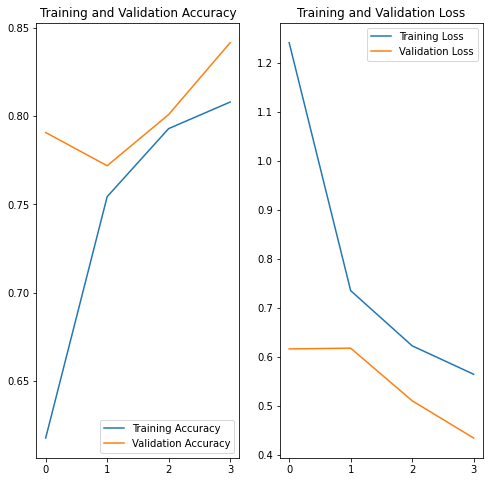

In [ ]:
acc = transfer_learning_history.history['accuracy']
val_acc = transfer_learning_history.history['val_accuracy']

loss = transfer_learning_history.history['loss']
val_loss = transfer_learning_history.history['val_loss']

epochs_range = range(4)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from keras.utils.np_utils import to_categorical 
test_labels = test_gen.classes  
test_labels = to_categorical(test_labels, num_classes=len(class_names)) 

In [ ]:
pred = np.round(model.predict(test_gen),0)
classification_metrics = metrics.classification_report(test_labels, pred)
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        74
           1       0.00      0.00      0.00       106
           2       0.00      0.00      0.00        98
           3       0.74      0.83      0.78       102
           4       0.00      0.00      0.00       105
           5       0.00      0.00      0.00        38
           6       0.02      0.02      0.02        96
           7       0.04      0.03      0.03       105
           8       0.00      0.00      0.00        40
           9       0.00      0.00      0.00        68
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00       100

   micro avg       0.17      0.17      0.17       934
   macro avg       0.14      0.15      0.15       934
weighted avg       0.16      0.17      0.16       934
 samples avg       0.17      0.17      0.17       934



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import itertools

In [ ]:
test_labels_tentative = pd.DataFrame(test_labels).idxmax(axis=1)
preds_tentative = pd.DataFrame(pred).idxmax(axis=1)

In [ ]:
confusion_matrix = confusion_matrix(test_labels_tentative, preds_tentative)
confusion_matrix

array([[ 71,   1,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103,   2],
       [  3,   0,   0,   0,   0,   1,  93,   0,   0,   0,   0,   1],
       [  4,   0,   0,  85,   0,   1,   0,   0,   0,  12,   0,   0],
       [  3,   0,   0,  29,   0,   0,   0,   0,   0,  73,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  30,   8,   0,   0,   0],
       [  4,   0,   2,   1,   0,  81,   2,   0,   2,   0,   0,   4],
       [  0,   0,  97,   0,   0,   2,   1,   3,   2,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40],
       [  1,   0,   2,   0,  64,   0,   0,   0,   0,   0,   0,   1],
       [  0,   1,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   1,   0,   0,  38,  59,   0,   0,   0]])